In [2]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer

import h5py
"""f = h5py.File('ioncanondprime.h5', 'r+')
del f['optimizer_weights']
f.close()"""

"f = h5py.File('ioncanondprime.h5', 'r+')\ndel f['optimizer_weights']\nf.close()"

In [3]:
model = keras.models.load_model("ioncanondprime.h5")

num_classes = 11

In [4]:
def hot(y):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(11))
    new_y = np.zeros((y.shape[0],y.shape[1]*num_classes))
    for i in range(len(y)):
        new_y[i,:] = label_binarizer.transform(y[i]).flatten()
    return new_y

In [5]:
X = np.load("resizecrop.npy")[0:13000,:]
y = np.load("nummertrain.npy").astype(int)[0:13000,:]

[ 1 10  7  0  0  3]
[1, 0, 7]


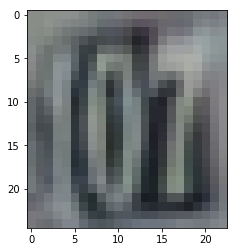

In [30]:
num = np.random.randint(len(X))
A = list(model.predict(X[num].reshape((1,X[1].shape[0],X[1].shape[1],X[1].shape[2]))))
A = [x%10 for x in np.argmax(np.array(A).reshape((5,11)),axis=1) if x != 0]
plt.imshow(X[num])
print(y[num])
print(A)
plt.show()

In [11]:
c=0
for i in range(len(X)):
    A = model.predict(X[i].reshape((1,X[1].shape[0],X[1].shape[1],X[1].shape[2])))
    if np.array_equal(np.argmax(y[i].reshape((6,11)),axis=1)[0:5],np.argmax(np.array(A).reshape((5,11)),axis=1)[0:5]):
        c+=1

ValueError: cannot reshape array of size 6 into shape (6,11)

In [7]:
A = np.array(model.predict(X))

Accuracy: 84.73846153846154
